# Exploratory Data Analysis

**Importing libraries and loading the data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/telco_churn_clean.csv")

In [3]:
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10, 5)


In [4]:
df['Churn'].value_counts(normalize=True)*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

*The overall churn rate rate is 26.5%. Which definitely matters to the revenue because acquiring a new customer is 5–7x more expensive than keeping an existing customer for a company.*

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_binary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


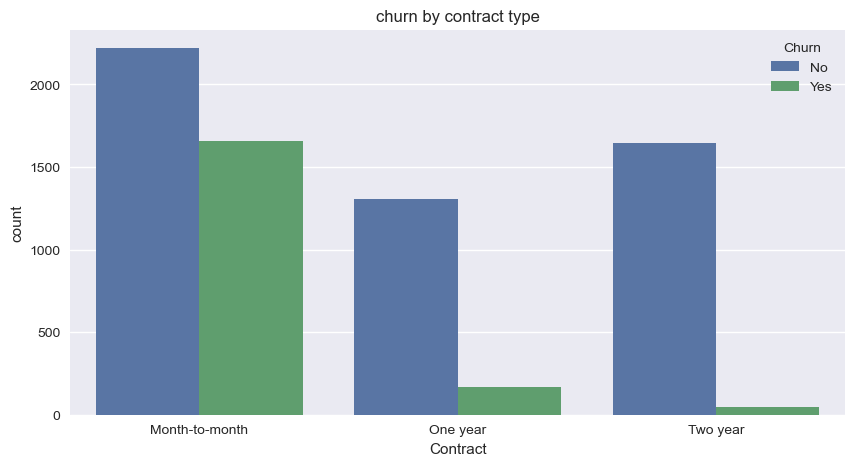

In [6]:
sns.countplot(x =df['Contract'], hue =df["Churn"])
plt.title("churn by contract type")
plt.show()

*Customers with month-to-month contracts churn the most compared to one-year and two-year contracts. The number of customers who left is much higher in the month-to-month category, while churn is very low for long-term contracts.*  
  
*Short-term contracts are risky because they do not require long-term commitment from customers. Since customers can cancel anytime, they are more likely to leave when they experience service issues, price changes, or find better alternatives. In contrast, long-term contracts help reduce churn by encouraging customers to stay longer.*

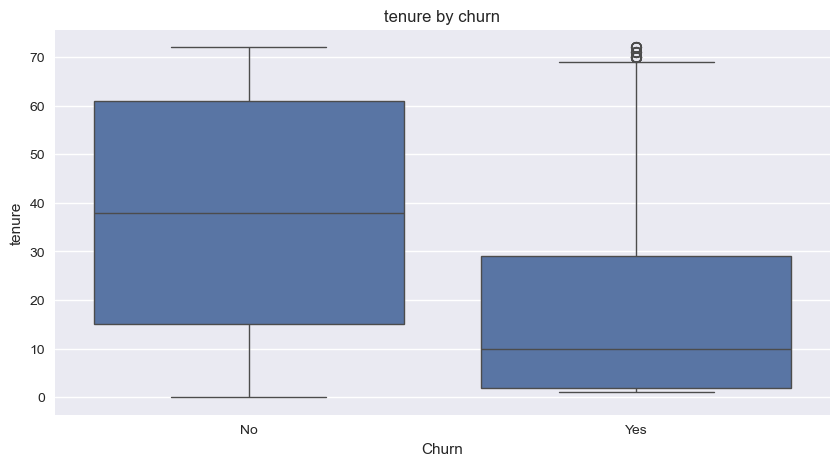

In [7]:
sns.boxplot(x=df["Churn"], y = df["tenure"])
plt.title("tenure by churn")
plt.show()

*From the tenure analysis, new customers churn more compared to long-term customers. Most customers who churn have a very low tenure, which suggests that problems happen early. This indicates that the first-month or early experience is very important — if customers are not satisfied at the beginning, they are more likely to leave.*

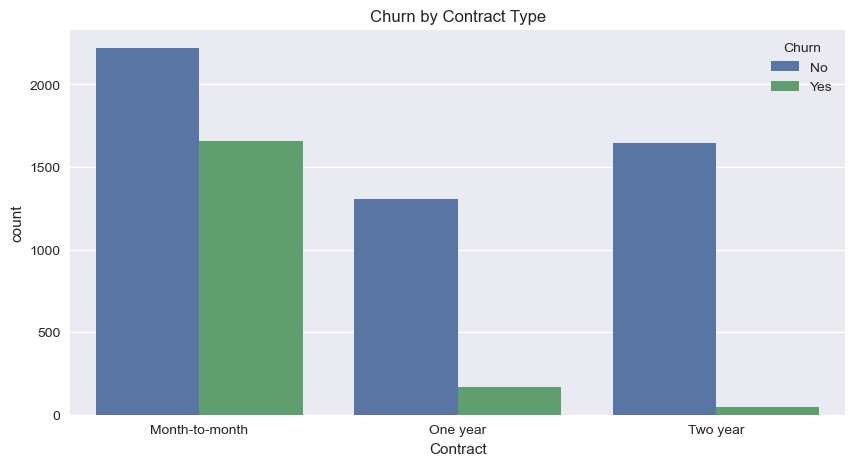

In [8]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.show()


In [9]:
pd.crosstab(df['Contract'],df['Churn'], normalize="index") * 100

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


*Customers with month-to-month contracts have the highest churn rate (around 43%), while those with one-year and two-year contracts churn much less. This shows that longer contracts help keep customers for a longer time. I think businesses can reduce churn by encouraging customers to choose longer plans*

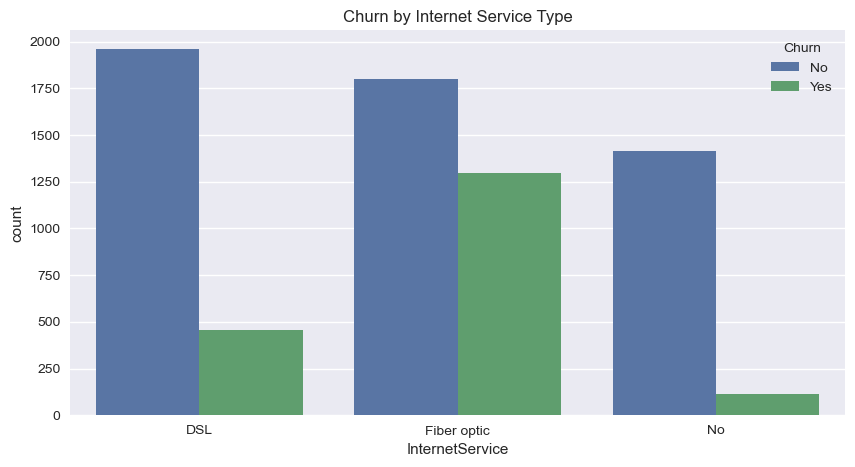

In [13]:
# Internet Service Type
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Churn by Internet Service Type")
plt.show()

*What this suggests:
Fiber optic customers may be facing service quality issues, higher pricing, or better alternatives from competitors.
Customers with no internet service churn the least, possibly because they rely on fewer services and face fewer problems.*

*Business insight:
The company should closely analyze fiber optic pricing, service reliability, and customer complaints to reduce churn in this segment.*

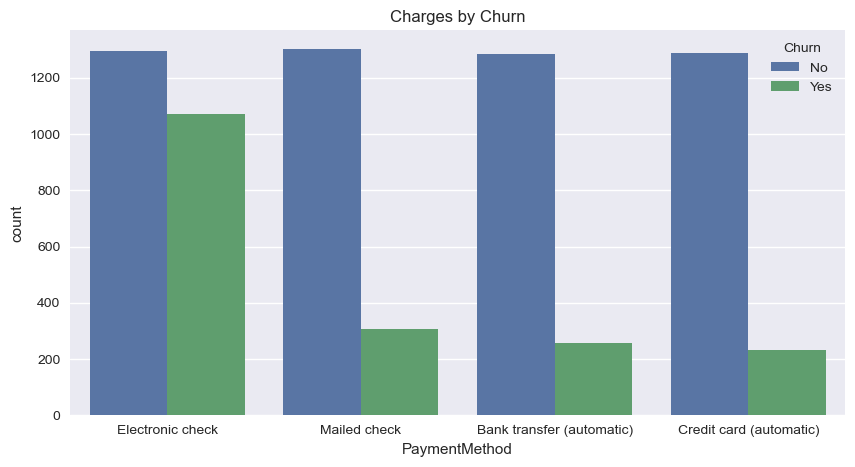

In [26]:
# Billing & Payment
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("Charges by Churn")
plt.show()

*What this suggests:
Electronic check users may be more price-sensitive.
There could be billing issues, extra charges, or a poor payment experience associated with this method.*

*Business insight:
Encouraging customers to switch to auto-pay or card-based payments could help reduce churn.*

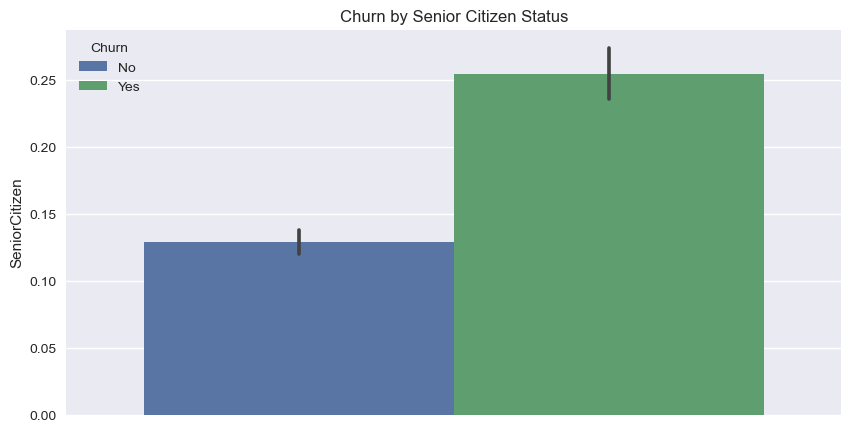

In [ ]:
# Churn by Senior Citizen or not 
sns.barplot( ="SeniorCitizen", hue="Churn", data=df)
plt.title("Churn by Senior Citizen Status")
plt.show()

In [33]:
pd.crosstab(df['SeniorCitizen'],df['Churn'], normalize="index") * 100

Churn,No,Yes
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


*What This Shows: Customer who are Senior citizen have high churn rate (around 41%) While Customer who are not senior citizen have low churn rate (around 21%) although there are no big difference.  
which may indicate that plans or services are not well aligned with their needs or expectations.*  
*Busines Insight: Company should make some changes in there Plans and services by which they can aligned with there needs or expectation*

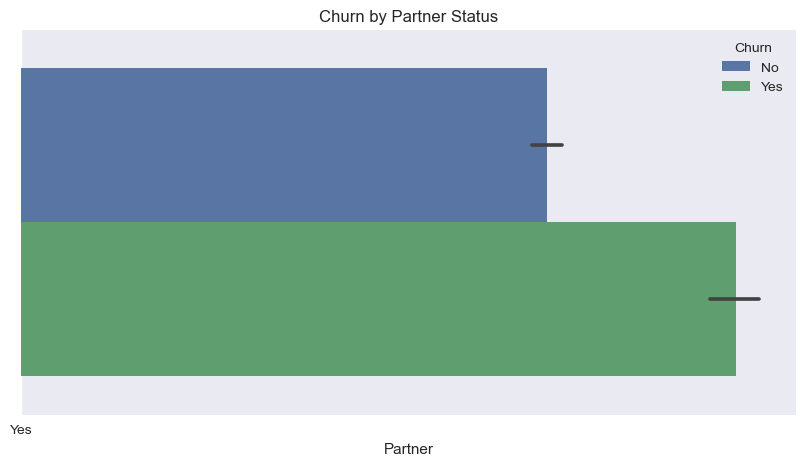

In [35]:
# Churn by PArtner status
sns.barplot(x ="Partner", hue="Churn", data=df)
plt.title("Churn by Partner Status")
plt.show()

In [39]:
pd.crosstab(df['Partner'],df['Churn'], normalize="index") * 100

Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903


*Customers without partners or dependents churn more, indicating lower long-term commitment.  
Add-on services like online security, backup, and tech support significantly reduce churn, as customers using these services are more engaged and dependent on the provider.  
Streaming services have little impact on churn, showing that core service quality and support matter more than entertainment features.*